# Восстановление золота из руды

Требуется подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

### Изучение файла

In [2]:
def open_file(file_name):
    data = pd.read_csv(file_name)
    return data

In [3]:
def data_info(data):
    return data.info()

In [4]:
def describe_data(data):
    return data.describe()

In [5]:
def na_mean(data):
    return data.isna().mean().sort_values()

In [6]:
def duplicated_data(data):
    return data.duplicated().sum()

<b>Обучающая выборка</b>

In [7]:
train_data = open_file('gold_recovery_train_new.csv')
display(train_data.head())
pd.set_option('display.max_columns', 90)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
data_info(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [9]:
display(describe_data(train_data))
pd.set_option('display.max_columns', 90)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [10]:
display(na_mean(train_data))
pd.set_option('display.max_rows', 88)

date                                        0.000000
rougher.output.concentrate_pb               0.000000
rougher.state.floatbank10_f_level           0.000000
rougher.state.floatbank10_f_air             0.000000
rougher.state.floatbank10_e_level           0.000000
                                              ...   
secondary_cleaner.state.floatbank2_a_air    0.015337
primary_cleaner.output.concentrate_sol      0.020213
rougher.input.floatbank11_xanthate          0.030249
rougher.state.floatbank10_e_air             0.030815
secondary_cleaner.output.tail_sol           0.113436
Length: 87, dtype: float64

In [11]:
duplicated_data(train_data)

0

В данных имеются пропуски, но в большинстве случаев они не превышают 3.5%, также следует преобразовать формат данных в столбце с датой, чтобы с ним было удобнее работать. Нет полных дубликатов в данных.

<b>Тестовая выборка</b>

In [12]:
test_data = open_file('gold_recovery_test_new.csv')
display(test_data.head())
pd.set_option('display.max_columns', 60)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [13]:
data_info(test_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [14]:
display(describe_data(test_data))
pd.set_option('display.max_columns', 60)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

In [15]:
na_mean(test_data)

date                                          0.000000
rougher.state.floatbank10_c_air               0.000000
rougher.state.floatbank10_c_level             0.000000
rougher.state.floatbank10_d_air               0.000000
rougher.state.floatbank10_d_level             0.000000
rougher.state.floatbank10_e_air               0.000000
rougher.state.floatbank10_e_level             0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank2_a_level    0.000000
secondary_cleaner.state.floatbank2_b_level    0.000000
secondary_cleaner.state.floatbank3_a_level    0.000000
secondary_cleaner.state.floatbank3_b_air      0.000000
secondary_cleaner.state.floatbank3_b_level    0.000000
secondary_cleaner.state.floatbank4_a_air      0.000000
secondary_cleaner.state.floatbank4_a_level    0.000000
secondary_cleaner.state.floatbank4_b_air      0.000000
secondary_cleaner.state.floatbank4_b_level    0.000000
secondary_

In [16]:
duplicated_data(test_data)

0

В данных присутствуют пропуски, но их доля незначительна. Также следует изменить формат даты. И как сказано в условии задачи, некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Дубликаты в данных отсутствуют

<b>Исходные данные</b>

In [17]:
data = open_file('gold_recovery_full_new.csv')
display(data.head())
pd.set_option('display.max_columns', 90)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,...,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646,6.733907,2.353017,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,...,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,14.265474,4.592547,9.001494,2.488248,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,8.603505,10.354494,19.167579,33.969464,16.491823,3.124664,6.471768,2.416800,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,...,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,14.115662,4.624775,8.842896,2.458187,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500

In [18]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [19]:
display(describe_data(data))
pd.set_option('display.max_columns', 90)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

In [20]:
display(na_mean(data))
pd.set_option('display.max_rows', 88)

date                                                  0.000000
rougher.state.floatbank10_f_level                     0.000000
rougher.output.concentrate_pb                         0.000000
rougher.state.floatbank10_f_air                       0.000000
rougher.state.floatbank10_e_level                     0.000000
rougher.state.floatbank10_d_level                     0.000000
rougher.state.floatbank10_d_air                       0.000000
secondary_cleaner.output.tail_au                      0.000000
rougher.output.tail_au                                0.000000
rougher.input.feed_ag                                 0.000000
rougher.output.tail_sol                               0.000000
rougher.output.tail_pb                                0.000000
rougher.output.recovery                               0.000000
rougher.input.feed_au                                 0.000000
rougher.output.concentrate_au                         0.000000
rougher.calculation.au_pb_ratio                       0

In [21]:
duplicated_data(data)

0

В некоторых столбцах присутствуют пропуски. Следует изменить формат данных в столбце с датой. Полные дубликаты в данных отсутствуют.

### Проверка, что эффективность обогащения рассчитана правильно

In [22]:
au_after_rougher = train_data['rougher.output.concentrate_au'] 
au_before_rougher = train_data['rougher.input.feed_au']
au_tail_after_rougher = train_data['rougher.output.tail_au']
train_data['recovery'] = (au_after_rougher*(au_before_rougher-au_tail_after_rougher))/(au_before_rougher*(au_after_rougher-au_tail_after_rougher))*100

In [23]:
MAE = mean_absolute_error(train_data['rougher.output.recovery'], train_data['recovery'])
print('MAE:', MAE)

MAE: 9.682896147825551e-15


Среднее абсолютное отклонение практически равно 0, это говорит о том, что значения практически одинаковые. Возможно такая погрешность возникает из-за того, что вычисления происходят во float.

### Анализ признаков, недоступных в тестовой выборке

In [24]:
print('Признаки недоступные в тестовой выборке:')
missing_columns = set(data.columns) - set(test_data.columns)
print(missing_columns)

Признаки недоступные в тестовой выборке:
{'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.concentrate_pb', 'final.output.tail_pb', 'final.output.recovery', 'primary_cleaner.output.tail_sol', 'rougher.output.concentrate_sol', 'final.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.tail_pb', 'rougher.output.tail_pb', 'primary_cleaner.output.concentrate_au', 'final.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_sol', 'final.output.concentrate_sol', 'final.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.outp

В тестовой выборке недоступны параметры продукта и расчётные характеристики, то есть в тестой выборке даны только параметры сырья и параметры, характеризующие текущее состояние этапа. Остальные характеристики рассчитываются значительно позже. Все параметры в данных столбцах относятся к типу float.

### Предобработка данных

In [25]:
def to_date(data):
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%dT%H:%M:%S')

<b>Тестовая выборка</b>

В тестовой выборке следует изменить формат даты, а также избавиться от пропусков

In [26]:
to_date(test_data)

In [27]:
na_mean(test_data)

date                                          0.000000
rougher.state.floatbank10_c_air               0.000000
rougher.state.floatbank10_c_level             0.000000
rougher.state.floatbank10_d_air               0.000000
rougher.state.floatbank10_d_level             0.000000
rougher.state.floatbank10_e_air               0.000000
rougher.state.floatbank10_e_level             0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank2_a_level    0.000000
secondary_cleaner.state.floatbank2_b_level    0.000000
secondary_cleaner.state.floatbank3_a_level    0.000000
secondary_cleaner.state.floatbank3_b_air      0.000000
secondary_cleaner.state.floatbank3_b_level    0.000000
secondary_cleaner.state.floatbank4_a_air      0.000000
secondary_cleaner.state.floatbank4_a_level    0.000000
secondary_cleaner.state.floatbank4_b_air      0.000000
secondary_cleaner.state.floatbank4_b_level    0.000000
secondary_

12 столбцов в тестовой выборке имеют пропуски в данных, заменим их медианным значением по столбцу

In [28]:
test_data = test_data.fillna(test_data.median())

In [29]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

<b>Обучающая выборка</b> 

В обучающей выборке также следует изменить формат даты и избавится от пропусков

In [30]:
to_date(train_data)

In [31]:
na_mean(train_data)

date                                                  0.000000
rougher.input.feed_ag                                 0.000000
rougher.input.feed_au                                 0.000000
rougher.output.concentrate_ag                         0.000000
rougher.output.concentrate_pb                         0.000000
rougher.output.concentrate_au                         0.000000
rougher.output.recovery                               0.000000
rougher.output.tail_pb                                0.000000
rougher.output.tail_sol                               0.000000
rougher.output.tail_au                                0.000000
rougher.state.floatbank10_d_air                       0.000000
rougher.state.floatbank10_d_level                     0.000000
rougher.state.floatbank10_e_level                     0.000000
rougher.state.floatbank10_f_air                       0.000000
rougher.state.floatbank10_f_level                     0.000000
secondary_cleaner.output.tail_au                      0

Один из столбцов (secondary_cleaner.output.tail_sol) имеет большое количество пропусков - 11.3436%, просто удалив их, мы потеряем большое количество данных. В данном столбцу указаны отвальные хвосты после второго этапа очистки. Возможно пропуски в данных означают то, что отвальных хвостов не было, следовательно их можно заполнить числом 0. Пропуски в остальных столбцах заменим медианным значением

In [32]:
train_data['secondary_cleaner.output.tail_sol'] = train_data['secondary_cleaner.output.tail_sol'].fillna(0)
train_data = train_data.fillna(train_data.median())
print(data_info(train_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

Изначально было 14148, после удаления пропусков осталось 12245. Также дата теперь имеет нужный тип.

<b>Исходные данные</b>

In [33]:
to_date(data)

In [34]:
na_mean(data)

date                                                  0.000000
rougher.state.floatbank10_f_level                     0.000000
rougher.output.concentrate_pb                         0.000000
rougher.state.floatbank10_f_air                       0.000000
rougher.state.floatbank10_e_level                     0.000000
rougher.state.floatbank10_d_level                     0.000000
rougher.state.floatbank10_d_air                       0.000000
secondary_cleaner.output.tail_au                      0.000000
rougher.output.tail_au                                0.000000
rougher.input.feed_ag                                 0.000000
rougher.output.tail_sol                               0.000000
rougher.output.tail_pb                                0.000000
rougher.output.recovery                               0.000000
rougher.input.feed_au                                 0.000000
rougher.output.concentrate_au                         0.000000
rougher.calculation.au_pb_ratio                       0

Также как и в случае с тестовой выборкой заменим пропущенные значения в столбце secondary_cleaner.output.tail_sol на 0. А остальные значения удалим.

In [35]:
data['secondary_cleaner.output.tail_sol'] = data['secondary_cleaner.output.tail_sol'].fillna(0)
data = data.fillna(data.median())
print(data_info(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

<b>Вывод:</b> теперь данные очищены от пропусков и приведены к нужному типу

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

#### Концентрация золота(au)

Text(0, 0.5, 'Частота встречаемости')

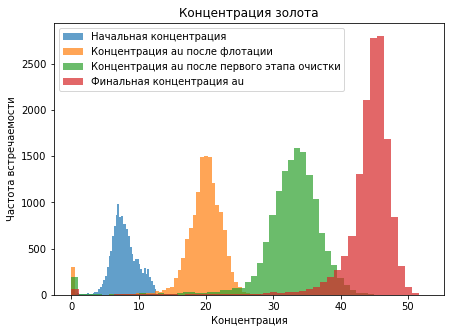

In [36]:
au_input = train_data['rougher.input.feed_au'] 
au_after_rougher = train_data['rougher.output.concentrate_au']
au_after_primary_cleaner = train_data['primary_cleaner.output.concentrate_au']
final_au = train_data['final.output.concentrate_au']

plt.figure(figsize=(7, 5))
plt.hist(au_input, label = 'Начальная концентрация', bins = 50, alpha = 0.7)
plt.hist(au_after_rougher, label = 'Концентрация au после флотации', bins = 50, alpha = 0.7)
plt.hist(au_after_primary_cleaner, label = 'Концентрация au после первого этапа очистки', bins = 50, alpha = 0.7)
plt.hist(final_au, label = 'Финальная концентрация au', bins = 50, alpha = 0.7)
plt.title('Концентрация золота')
plt.legend()
plt.xlabel('Концентрация')
plt.ylabel('Частота встречаемости')

Концентрация золота с каждым этапом очистки увеличивается, но можно заметить выбросы около нуля

#### Концентрация серебра(ag)

Text(0, 0.5, 'Частота встречаемости')

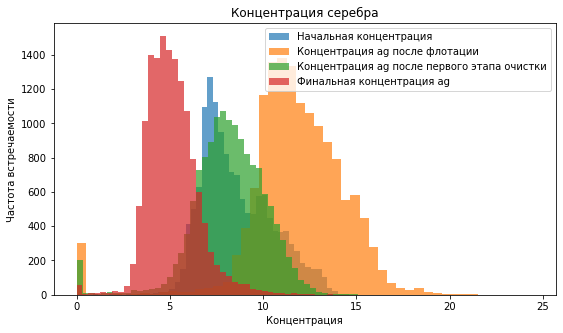

In [37]:
ag_input = train_data['rougher.input.feed_ag'] 
ag_after_rougher = train_data['rougher.output.concentrate_ag']
ag_after_primary_cleaner = train_data['primary_cleaner.output.concentrate_ag']
final_ag = train_data['final.output.concentrate_ag']

plt.figure(figsize=(9, 5))
plt.hist(ag_input, label = 'Начальная концентрация', bins = 50, alpha = 0.7)
plt.hist(ag_after_rougher, label = 'Концентрация ag после флотации', bins = 50, alpha = 0.7)
plt.hist(ag_after_primary_cleaner, label = 'Концентрация ag после первого этапа очистки', bins = 50, alpha = 0.7)
plt.hist(final_ag, label = 'Финальная концентрация ag', bins = 50, alpha = 0.7)
plt.title('Концентрация серебра')
plt.legend()
plt.xlabel('Концентрация')
plt.ylabel('Частота встречаемости')

После флотация концентрация серебра увеличивается, далее происходит уменьшение концентрации серебра. Также, как и в случае с золотом заметны выбросы около нуля

#### Концентрация свинца(pb)

Text(0, 0.5, 'Частота встречаемости')

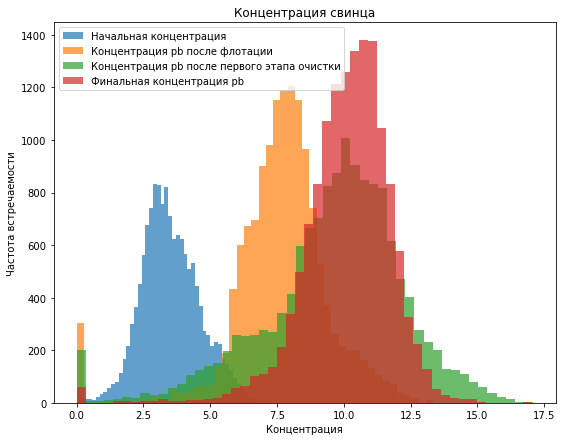

In [38]:
pb_input = train_data['rougher.input.feed_pb'] 
pb_after_rougher = train_data['rougher.output.concentrate_pb']
pb_after_primary_cleaner = train_data['primary_cleaner.output.concentrate_pb']
final_pb = train_data['final.output.concentrate_pb']

plt.figure(figsize=(9, 7))
plt.hist(pb_input, label = 'Начальная концентрация', bins = 50, alpha = 0.7)
plt.hist(pb_after_rougher, label = 'Концентрация pb после флотации', bins = 50, alpha = 0.7)
plt.hist(pb_after_primary_cleaner, label = 'Концентрация pb после первого этапа очистки', bins = 50, alpha = 0.7)
plt.hist(final_pb, label = 'Финальная концентрация pb', bins = 50, alpha = 0.7)
plt.title('Концентрация свинца')
plt.legend()
plt.xlabel('Концентрация')
plt.ylabel('Частота встречаемости')

После этапа флотации концентрация свинца увеличивается, далее концентрация увеличивается после первого этапа очистки, но остается примерно неизменной к финальному этапу очистки

<b>Вывод:</b> на гистограммах концентраций по всем 3 веществам (золото, серебро, свинец) заметны выбросы около нуля

### Распределение размеров гранул сырья на обучающей и тестовой выборках

Средний размер гранул в обучающей выборке 60.06231145317479
Средний размер гранул в тестовой выборке 55.950131461159394


Text(0, 0.5, 'Частота встречаемости')

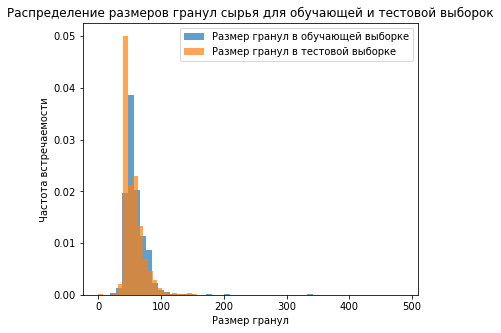

In [39]:
print('Средний размер гранул в обучающей выборке', train_data['rougher.input.feed_size'].mean())
print('Средний размер гранул в тестовой выборке', test_data['rougher.input.feed_size'].mean())

plt.figure(figsize=(6, 5))
plt.hist(train_data['rougher.input.feed_size'], label = 'Размер гранул в обучающей выборке', bins = 50, density = True, alpha = 0.7)
plt.hist(test_data['rougher.input.feed_size'], label = 'Размер гранул в тестовой выборке', bins = 50, density = True, alpha = 0.7)
plt.title('Распределение размеров гранул сырья для обучающей и тестовой выборок')
plt.legend()
plt.xlabel('Размер гранул')
plt.ylabel('Частота встречаемости')

Размер гранул сырья для обучающей и тестовой выборок примерно одинаковый

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

#### Суммарная концентрация в обучающей выборке

Text(0, 0.5, 'Частота встречаемости')

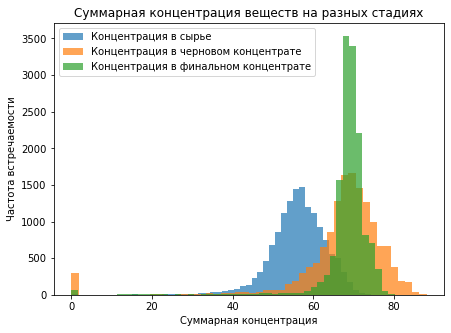

In [40]:
sum_concentration_input = train_data['rougher.input.feed_ag'] + train_data['rougher.input.feed_pb'] + train_data['rougher.input.feed_sol'] + train_data['rougher.input.feed_au'] 
sum_concentration_after_rougher =  train_data['rougher.output.concentrate_ag'] + train_data['rougher.output.concentrate_pb'] + train_data['rougher.output.concentrate_sol'] + train_data['rougher.output.concentrate_au']
final_concentration = train_data['final.output.concentrate_ag'] + train_data['final.output.concentrate_pb'] + train_data['final.output.concentrate_sol'] + train_data['final.output.concentrate_au']

plt.figure(figsize=(7, 5))
plt.hist(sum_concentration_input, label = 'Концентрация в сырье', bins = 50, alpha = 0.7)
plt.hist(sum_concentration_after_rougher, label = 'Концентрация в черновом концентрате', bins = 50, alpha = 0.7)
plt.hist(final_concentration, label = 'Концентрация в финальном концентрате', bins = 50, alpha = 0.7)
plt.title('Суммарная концентрация веществ на разных стадиях')
plt.legend()
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота встречаемости')

На графике около нуля можно наблюдать аномальные значения, то есть те, где суммарная концентрация веществ близка к нулю. Следует избавится от аномалии и удалить те значения, где концентрация веществ равна 0.

In [41]:
train_data = train_data.drop(train_data[train_data['rougher.input.feed_ag'] == 0].index)
train_data = train_data.drop(train_data[train_data['rougher.input.feed_pb'] == 0].index)
train_data = train_data.drop(train_data[train_data['rougher.input.feed_sol'] == 0].index)
train_data = train_data.drop(train_data[train_data['rougher.input.feed_au'] == 0].index)

train_data = train_data.drop(train_data[train_data['rougher.output.concentrate_ag'] == 0].index)
train_data = train_data.drop(train_data[train_data['rougher.output.concentrate_pb'] == 0].index)
train_data = train_data.drop(train_data[train_data['rougher.output.concentrate_sol'] == 0].index)
train_data = train_data.drop(train_data[train_data['rougher.output.concentrate_au'] == 0].index)

train_data = train_data.drop(train_data[train_data['final.output.concentrate_ag'] == 0].index)
train_data = train_data.drop(train_data[train_data['final.output.concentrate_pb'] == 0].index)
train_data = train_data.drop(train_data[train_data['final.output.concentrate_sol'] == 0].index)
train_data = train_data.drop(train_data[train_data['final.output.concentrate_au'] == 0].index)

Text(0, 0.5, 'Частота встречаемости')

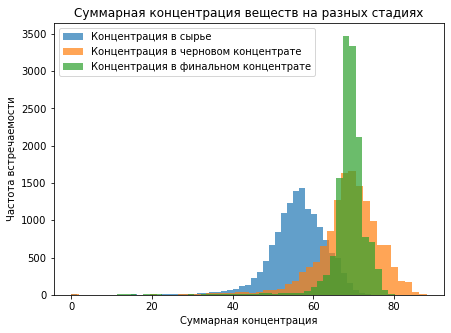

In [42]:
sum_concentration_input = train_data['rougher.input.feed_ag'] + train_data['rougher.input.feed_pb'] + train_data['rougher.input.feed_sol'] + train_data['rougher.input.feed_au'] 
sum_concentration_after_rougher =  train_data['rougher.output.concentrate_ag'] + train_data['rougher.output.concentrate_pb'] + train_data['rougher.output.concentrate_sol'] + train_data['rougher.output.concentrate_au']
final_concentration = train_data['final.output.concentrate_ag'] + train_data['final.output.concentrate_pb'] + train_data['final.output.concentrate_sol'] + train_data['final.output.concentrate_au']

plt.figure(figsize=(7, 5))
plt.hist(sum_concentration_input, label = 'Концентрация в сырье', bins = 50, alpha = 0.7)
plt.hist(sum_concentration_after_rougher, label = 'Концентрация в черновом концентрате', bins = 50, alpha = 0.7)
plt.hist(final_concentration, label = 'Концентрация в финальном концентрате', bins = 50, alpha = 0.7)
plt.title('Суммарная концентрация веществ на разных стадиях')
plt.legend()
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота встречаемости')

После удаления нулевых значений из нужных для расчета данных выбросов стало значительно меньше

#### Суммарная концентрация в тестовой выборке

Text(0, 0.5, 'Частота встречаемости')

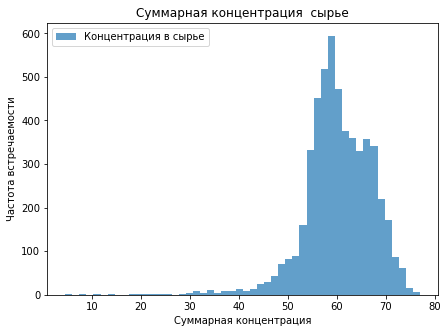

In [43]:
sum_concentration_input_test = test_data['rougher.input.feed_ag'] + test_data['rougher.input.feed_pb'] + test_data['rougher.input.feed_sol'] + test_data['rougher.input.feed_au'] 

plt.figure(figsize=(7, 5))
plt.hist(sum_concentration_input_test, label = 'Концентрация в сырье', bins = 50, alpha = 0.7)
plt.title('Суммарная концентрация  сырье')
plt.legend()
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота встречаемости')

## Модель

### Функция для вычисления итоговой sMAPE

In [44]:
def smape(target, prediction):
    target = np.array(target)
    prediction = np.array(prediction)
    return 1/len(target)*sum((abs(target-prediction))/((abs(target)+abs(prediction))/2))

In [45]:
def final_smape(target, prediction):
    target = np.array(target)
    return 0.25 * smape(target[:, 0], prediction[:, 0]) + 0.75 * smape(target[:, 1], prediction[:, 1])

### Обучение моделей и оценка их качества кросс-валидацией

#### Подготовка выборок

Для того, чтобы можно было работать с выборками создадим 2 новые выборки, для исходных данных и для тестовых данных, где в качестве индексов будет использоваться дата. Далее присоеденим к тестовой выборке 2 столбца из иходной выборки с эффективностью после флотации и финальной эффективностью.

In [46]:
new_data = data.set_index('date')
new_test_data = test_data.set_index('date')
new_test_data = new_test_data.merge(new_data[['rougher.output.recovery', 'final.output.recovery']], how = 'left', right_index = True, left_index = True)

new_test_data = new_test_data.dropna().reset_index(drop = True)
display(new_test_data)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.74672

Следующим шагом следует избавится в обучающей выборке от столбцов, которых нет в тестовой выборке.

In [47]:
missing_columns.remove('rougher.output.recovery')
missing_columns.remove('final.output.recovery')
print(missing_columns)

{'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'final.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.output.concentrate_sol', 'final.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.tail_pb', 'rougher.output.tail_pb', 'primary_cleaner.output.concentrate_au', 'final.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_sol', 'final.output.concentrate_sol', 'final.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag', 'rougher.output.concentrate_ag', 'rougher.output.tail_ag', 'rougher.output.tail_

In [48]:
for column in missing_columns:
    train_data.drop(column, axis = 1, inplace = True)
train_data = train_data.drop(['recovery', 'date'], axis = 1)
train_data.head()

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,87.107763,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,86.843261,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,86.842308,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,87.226430,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.

Теперь обучающая выборка и тестовая выборка имеют одинаковое количество столбцов (признаков)

#### Обучение модели

Целевой признак имеет количественное значение, поэтому будем решать задачу регрессии. Следует проверить 3 алгоритма: алгоритм решащего дерева, случайного леса и линейная регрессия.

In [49]:
features = train_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = train_data[['rougher.output.recovery', 'final.output.recovery']]

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

##### Алгоритм решающего дерева

In [50]:
best_model_decision_tree = None
best_scores = 10000
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeRegressor(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    scores = cross_val_score(model, features, target, scoring = make_scorer(final_smape, greater_is_better = False), cv = 5)
    final_scores = sum(scores) / len(scores)
    if final_scores < best_scores:
        best_model_decision_tree = model
        best_scores = final_scores
        best_depth = depth

print('Итоговое sMAPE:', best_scores, "Глубина дерева:", best_depth)

Итоговое sMAPE: -0.16000550858473037 Глубина дерева: 16


##### Алгоритм случайного леса

In [51]:
best_model_random_forest = None
best_scores = 10000
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid) 
        scores = cross_val_score(model, features, target, scoring = make_scorer(final_smape, greater_is_better = False), cv = 5)
        final_scores = sum(scores) / len(scores)
        if final_scores < best_scores:
            best_model_random_forest = model
            best_scores = final_scores
            best_est = est
            best_depth = depth

print('Итоговое sMAPE', best_scores, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

Итоговое sMAPE -0.10714499191335528 Количество деревьев: 10 Максимальная глубина: 10


##### Линейная регрессия

In [52]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(features_train, target_train)
predictions_valid = model_linear_regression.predict(features_valid)

scores = cross_val_score(model_linear_regression, features, target, scoring = make_scorer(final_smape, greater_is_better = False), cv = 5)
final_scores = sum(scores) / len(scores)
print('Итоговое sMAPE:', final_scores)

Итоговое sMAPE: -0.10315819292233315


Лучшие метрики качества дает лнейная регрессия, так как в данном случае следует интерпретировать итоговое sMAPE по модулю. А так как мы минимизируем значение sMAPE, то лучший результат будет 0.10315819292233294 у модели линейной регрессии

#### Проверка модели на тестовой выборке

In [53]:
features_test = new_test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = new_test_data[['rougher.output.recovery', 'final.output.recovery']]

In [54]:
predictions_test = model_linear_regression.predict(features_test)

print('Итоговое sMAPE:', final_smape(target_test, predictions_test))

Итоговое sMAPE: 0.09629855001194798


## Вывод

Был подготовлен прототип модели машинного обучения для «Цифры». Лучшей моделью был выбран алгоритм линейной регрессии. Именно данный алгоритм дал наилучшие результаты по метрике sMAPE, на тестовой выборке данный алгорим показал итоговое sMAPE 0.0963